# Markov Chain Model Implimenting to Auto-Generate a Tweet

## Introduction

Twitter is a social media network which has more than 319 million monthly active users as of 2016. Twitter has a feature of the certified user, which is the reason people follow many influencer leaders who can pass their message quickly. People writing these tweets have repetitiveness in their tweet. By figuring out this behavior, one can auto-generate the tweet by feeding on the tweet topic. Although final sentence quality depends on how well we formulate the method. One of the models for predicting possible event sequences is the Markov Chain Model.

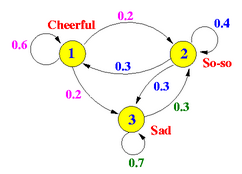

In [1]:
from IPython.display import Image
Image('markov_chain_example.png')

As shown in the figure, 3 states are available to be in. If we start from state 1, then in next event probability of staying on state 1 is 0.6, the probability of changing the state to 2 and 3 is respectively 0.2 and 0.2. This stochastic approach predicts the sequence of events. In this report, this technique is used to understand the very basic methodology and early stage of auto writing. One can pass a starting word of the sentence here, and you receive the tweet of 280 word, which is the new word limit twitter just updated. Two users, namely former President Barak Obama and President Donald Trump's previous tweet from 2016 is used to gain knowledge of this repetitiveness.

## Data Set
The tweet of these two users is collected from November 2016 and have 200 tweets for each user. To use this data for our use, first links and date-time stamps are removed from these tweets. Further twitter is split in word and made the word pair of word and its consecutive word. One has to figure out that how many times this word pair is used by the user.

In [2]:
import numpy as np

def join_string(list_string):
    string = ' '.join(list_string)
    return string

def next(pin):
    p = np.array(pin)
    csp = p.cumsum()
    r = np.random.rand()
    i = (r<csp).argmax()  # index of first True in r<csp
    return i

Two functions are defined here, where the first function can join the list of string and return as sentences with white space in between. The second function takes the list of a number, which sums up cumulatively and stored in another array. Then the random number is generated by numpy command random.rand(). The function will return the index of first true if the random number is less than the cumulative sum.

In [3]:
with open('tweets.txt',encoding='utf8') as tf:
    ########## Tweet generatoion using President Trump's tweets ##########
    tweets = [line for line in tf.read().split('\n') if len(line)>0 and line.startswith('RealDonaldTrump') ]
    ########## Tweet generatoion using President Obama's tweets ##########
    #tweets = [line for line in tf.read().split('\n') if len(line)>0 and line.startswith('BarackObama') ]

Above code would open the file from data is stored. And it will be split by a new line and considered only tweets of President Donald Trump. One can uncomment the fifth line to get the tweets of President Barak Obama.

## Methodology
Now one has to make the word pair of word and it's consecutive word. This can be done with zip command. These word pairs can be stored in the dictionary, where the word is the key of the dictionary. And the value of this dictionary is also consist of a dictionary of the key being consecutive word and value being a count of that particular pair. One can also make the same structured dictionary of probability, the value of the second dictionary set as probability instead of count. Probability can be found by given equation.
$$Probability_{word\ pair} = \frac{Counts\ of\ Perticular\ Consecutive\ Word}{Sum\ of\ counts\ of\ all\ possible\ consecutive\ words}$$

In [6]:
counts = {}
probability = {}

for tweet in tweets:
    words = tweet.lower().split()
    # Remove links, username and date-time stamps
    words = words[2:]
    words = [word for word in words if not word.startswith('http')]
    new_string = join_string(words)
    # Replace these symbols with Space and symbol to be considered as a word
    words = new_string.replace('#','# ').replace('@','@ ').replace('.',' .').replace('!',' !').replace(',',' ,').replace(':',' :').replace(';',' ;').replace('...',' ...').replace('(',' (').replace(')',' )').split()
    #Zip the words to make the pairs   
    wps = list(zip( words[:-1], words[1:] ))
    # Dictonary for counts
    for wp in wps:
        if wp[0] not in counts.keys():
            counts[wp[0]] = {}
        if wp[1] not in counts[wp[0]].keys():
            counts[wp[0]][wp[1]] = 1
        else:
            counts[wp[0]][wp[1]] += 1
    # Dictonary for probability
    for f in counts.keys():
        probability[f] = {}
        for s in counts[f].keys():
            probability[f][s] = counts[f][s]/sum(counts[f].values())
            
# Just for Output
def second(x): return x[1]
for wp,count in sorted( probability['make'].items(), key=second, reverse=True ):
    print(count,'make',wp)

0.38461538461538464 make america
0.07692307692307693 make me
0.07692307692307693 make up
0.07692307692307693 make things
0.07692307692307693 make california
0.07692307692307693 make you
0.07692307692307693 make joseph
0.07692307692307693 make business
0.07692307692307693 make a


Here one example is shown, the word is 'make'. And it has different consecutive words like 'america', 'business'. We can see that except for 'america', all have 0.07 probability of coming after 'make'. While 'america' is used 38% of the time whenever President Trump used 'make'.

## Implementation
Now one can provide an initial word and can produce the tweet with the code given below. The function mentioned above can be used to give indices where the first condition is satisfied with probability and the random number. That indices capture the next word and can again be used as a new word, to begin with.

In [8]:
# Choose Initial word as you like
initialword = 'a'
new_tweet = initialword
next_word = initialword
while len(new_tweet) < 280:
    lis = []
    for a in probability[next_word].keys():
        lis = lis + [probability[next_word][a]]
    i = next(lis) # Next function defined above
    cond = list(probability[next_word].keys())[i]
    if cond == '.' or cond == ',' or cond == '!' or cond == ':' or cond == ';':
        new_tweet = new_tweet + cond
        next_word = cond
    else:
        new_tweet = new_tweet + ' ' + cond
        next_word = cond
print('new tweet = ',new_tweet + '.')

new tweet =  a total endorsement! rigged and complete and our vets. .and according to be a number of florida is that happen .” can you are no collusion is strong on crime, fuel, if trump campaign finance violation, good people trying endlessly to be fired from the @ secpompeo to keep their corrupt.


Here the initial word is set as 'a', and we can see some common phrases like "a total endorsement". One sentence has "according to", and then with 'to', 'be' has a higher probability, making the sentence like "according to be". Which is not making a sense.

Output using tweets of President Obama's:
"new tweet =  a better time to keep pushing towards justice for his paychecks from 2017. today’s decision to the country we can # obamacare, together, america's uninsured rate has been short a beautiful day, president obama lays out to love. you’re leading us have. caring for you? thanks to get."

In this tweet, it makes sense for the initial some sentences, but the phrasing of sentences is poor. Although we can say that this tweet does sound like President Obama's tweet.

## Conclusion
The pair of word and consecutive word is used, we can distinguish between the tweets and can recognize the user. Although it does not have any meaning. Some half sentence looks like going in right direction, but this model fully based on the stochastic method it can not pick up the right word.

There are two alternatives, first being instead of using the only word, we can use the pair of word pair and consecutive word pair. Example: Instead of the current state being 'make', we have 'make america', paired with 'america great'. Further study is required to see if this approach can generate the realistic tweets.

The second approach is to use the mix of the stochastic and heuristic method. We can introduce some penalty in probability function by comparing it to available sentence structure.

## References
Class note (Image : Markov Chain)

https://en.wikipedia.org/wiki/Twitter

https://en.wikipedia.org/wiki/Markov_chain